# АНАЛИЗ ГИПОТЕЗ ДЛЯ УВЕЛИЧЕНИЯ ВЫРУЧКИ

В рамках данного исследования проведем анализ 9 гипотез для увеличения выручки.

Исследование будет проводиться в два этапа: на первом этапе приоритизируем гипотезы, используя модели ICE и RICE, а на втором этапе - анализируем результаты проведенного A/B-теста.

## Подготовка данных для дальнейшей работы.

На этом этапе импортируем и готовим данные для работы - проверяем наборы данных на пропуски, дубликаты, приводим все данные к единой форме, подходящей для дальнейшей обработки.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
df_hypo = pd.read_csv(r'/datasets/hypothesis.csv')
orders = pd.read_csv(r'/datasets/orders.csv')
visitors = pd.read_csv(r'/datasets/visitors.csv')

In [4]:
df_hypo.columns=map(str.lower,df_hypo.columns)
orders.columns=map(str.lower,orders.columns)
visitors.columns=map(str.lower,visitors.columns)

In [5]:
pd.set_option('display.max_colwidth', False)
display(df_hypo)
display(orders.head(5))
display(visitors.head(5))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

### Гипотезы

Набор данных готов к дальнейшей обработке.

### Заказы и посетители

В этих наборах данных имеются поля "дата", которые необходимо преобразовать в тип datetime, также необходимо проверить данные на наличие дубликатов и пропусков.

In [6]:
orders['date']=orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
visitors['date']=visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
display('Дубликаты в данных о заказах: ' + str(len(orders[orders.duplicated()==True])))
display('Дубликаты в данных о количестве пользователей: ' + str(len(visitors[visitors.duplicated()==True])))

'Дубликаты в данных о заказах: 0'

'Дубликаты в данных о количестве пользователей: 0'

In [9]:
display('Пропуски в данных о заказах: ' + str(orders.isna().sum().sum()))
display('Пропуски в данных о количестве пользователей: ' + str(visitors.isna().sum().sum()))

'Пропуски в данных о заказах: 0'

'Пропуски в данных о количестве пользователей: 0'

In [10]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [11]:
if (orders['date'].min()==visitors['date'].min()) & (orders['date'].max()==visitors['date'].max()):
    datestart = orders['date'].min()
    dateend = orders['date'].max()
    display('Анализ выполняется для периода с ' + str(datestart) + ' по ' + str(dateend))
else:
    display('Даты в наборах данных отличаются!')

'Анализ выполняется для периода с 2019-08-01 00:00:00 по 2019-08-31 00:00:00'

Дубликаты и пропуски в данных отсутствуют, периоды, охватываемые наборами данных, одинаковые.

Базовая подготовка завершена.

## Приоритизация гипотез

Мы проранжируем гипотезы, используя методики ICE и RICE.

In [12]:
df_hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [13]:
df_hypo['ice']=((df_hypo['impact']*df_hypo['confidence'])/df_hypo['efforts']).round(2)
display(df_hypo.sort_values(by='ice', ascending = False))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


In [14]:
df_hypo['rice']=((df_hypo['reach']*df_hypo['impact']*df_hypo['confidence'])/df_hypo['efforts']).round(2)
display(df_hypo.sort_values(by='rice', ascending = False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


Уровень значимости гипотез по матрицам ICE и RICE отличается, в основном, за счет параметра *reach* - *охват*.

Конкретно, гипотеза под индексом 7 обладает охватом 10 (максимальным) и относительно невысоким уровнем вложенных усилий (5), а влияние и уверенность 7 и 8 соответственно; параметр "охват" оказал весомый вклад в приоритетность этой гипотезы.

Ситуация с остальными гипотезами аналогична - при добавлении параметра "охват" может значительно измениться "вес" гипотезы в целом.

## Анализ A/B-теста

In [7]:
display(orders.info())
display(orders.head())
display(visitors.info())
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


###  Анализируем кумулятивную выручку по группам

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

/tmp/ipykernel_31/2909621514.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


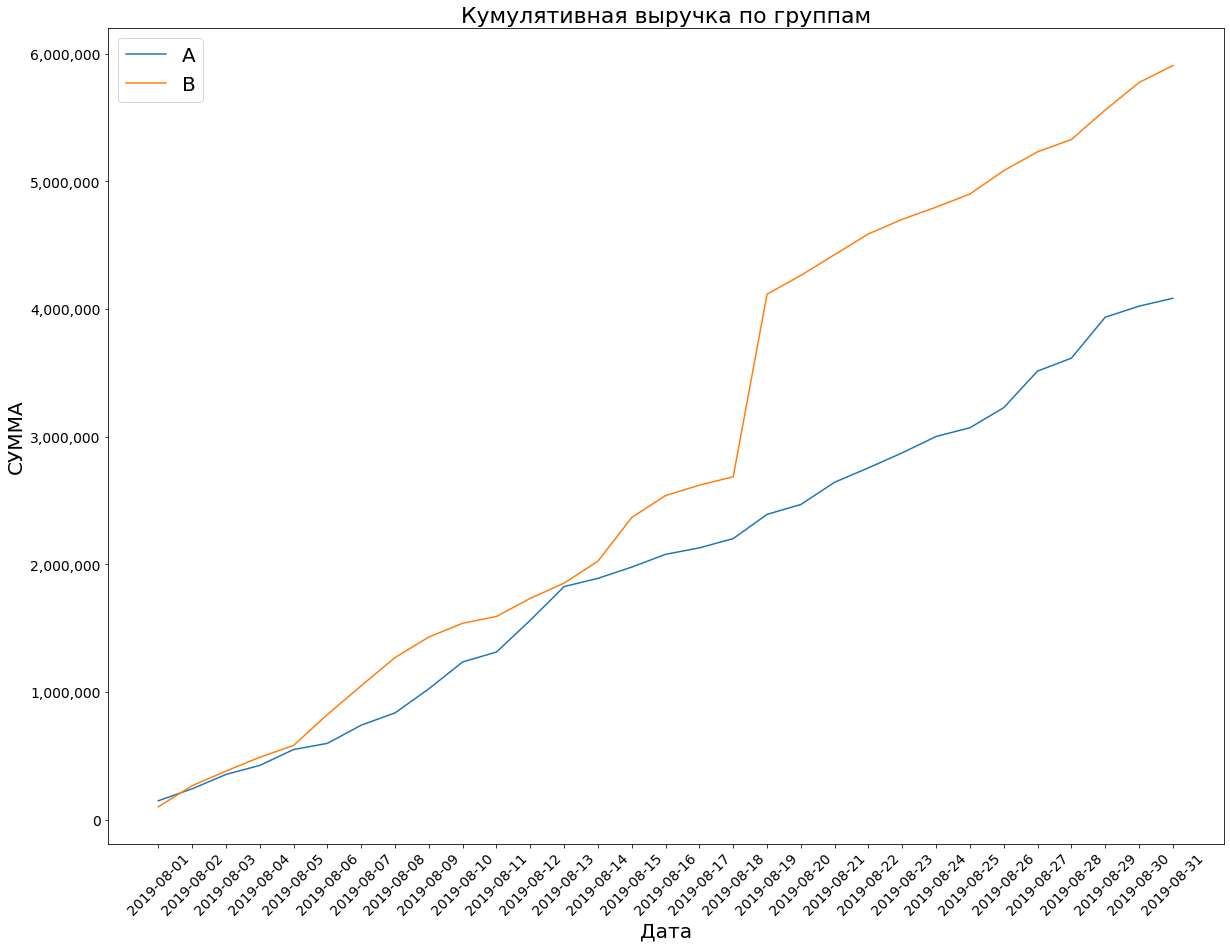

In [23]:
plt.figure(figsize = (20,15))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
#plt.ticklabel_format(axis='y', scilimits=(0,10), format='')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(fontsize=14, rotation = 45)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.title('Кумулятивная выручка по группам', fontsize = 22)
plt.ylabel('СУММА', fontsize=20)
plt.xlabel('Дата', fontsize=20)
plt.show()

Из графика кумулятивной выручки видно, что группа B стабильно показывает более высокую выручку во второй трети анализируемого периода.
Резкий скачок кумулятивной выручки группы B в начале последней трети анализируемого периода, скорее всего, обусловлен крупными заказами; выясним в ходе дальнейшего анализа.

### Анализируем средний чек по группам

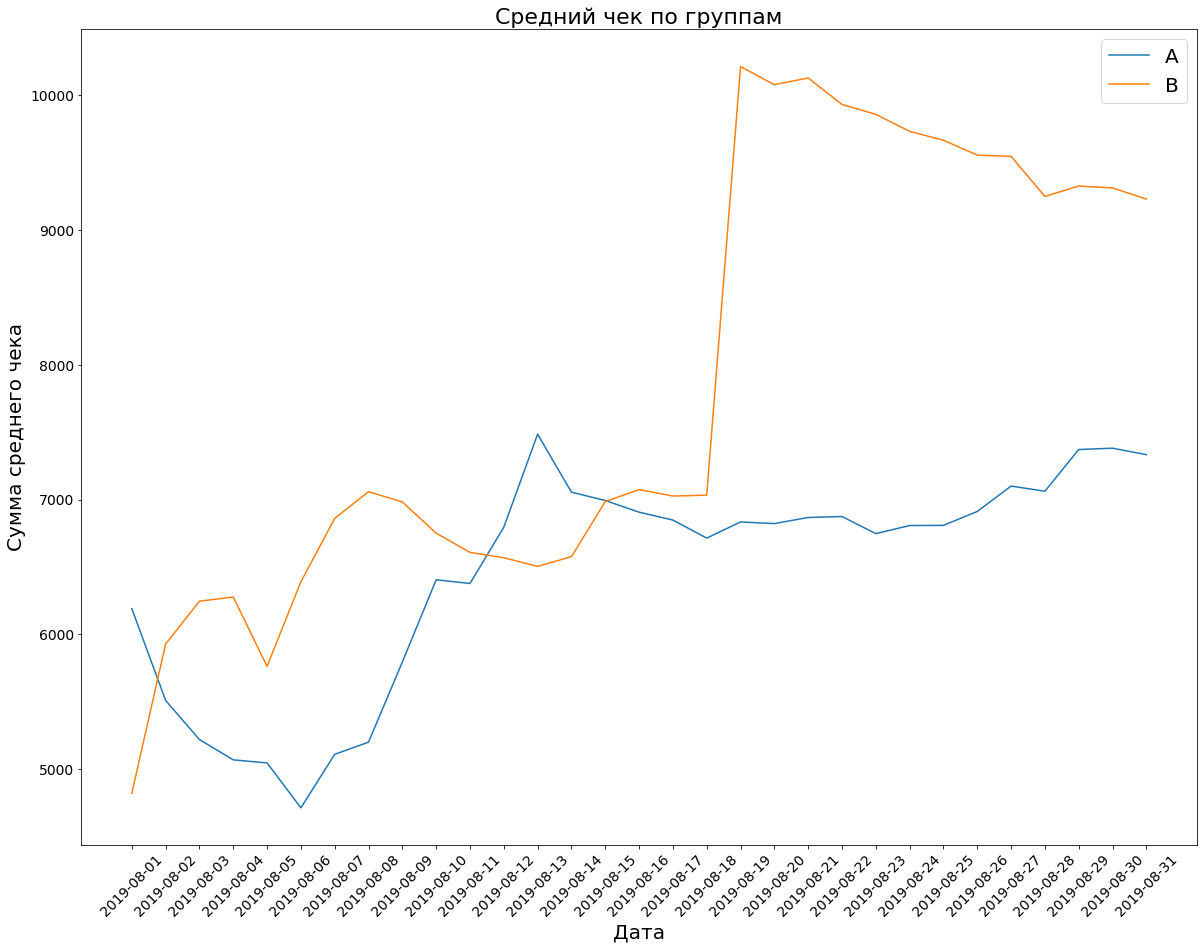

In [24]:
plt.figure(figsize = (20,15))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.title('Средний чек по группам', fontsize=22)
plt.ylabel('Сумма среднего чека', fontsize=20)
plt.xlabel('Дата', fontsize=20)
plt.show()

Видим просадку среднего чека в группе B в середине периода, резкий рост среднего чека в группе B в последней трети периода, также фиксируем выброс среднего чека в группе A в середине периода.

### Анализируем различия между средним чеком в динамике

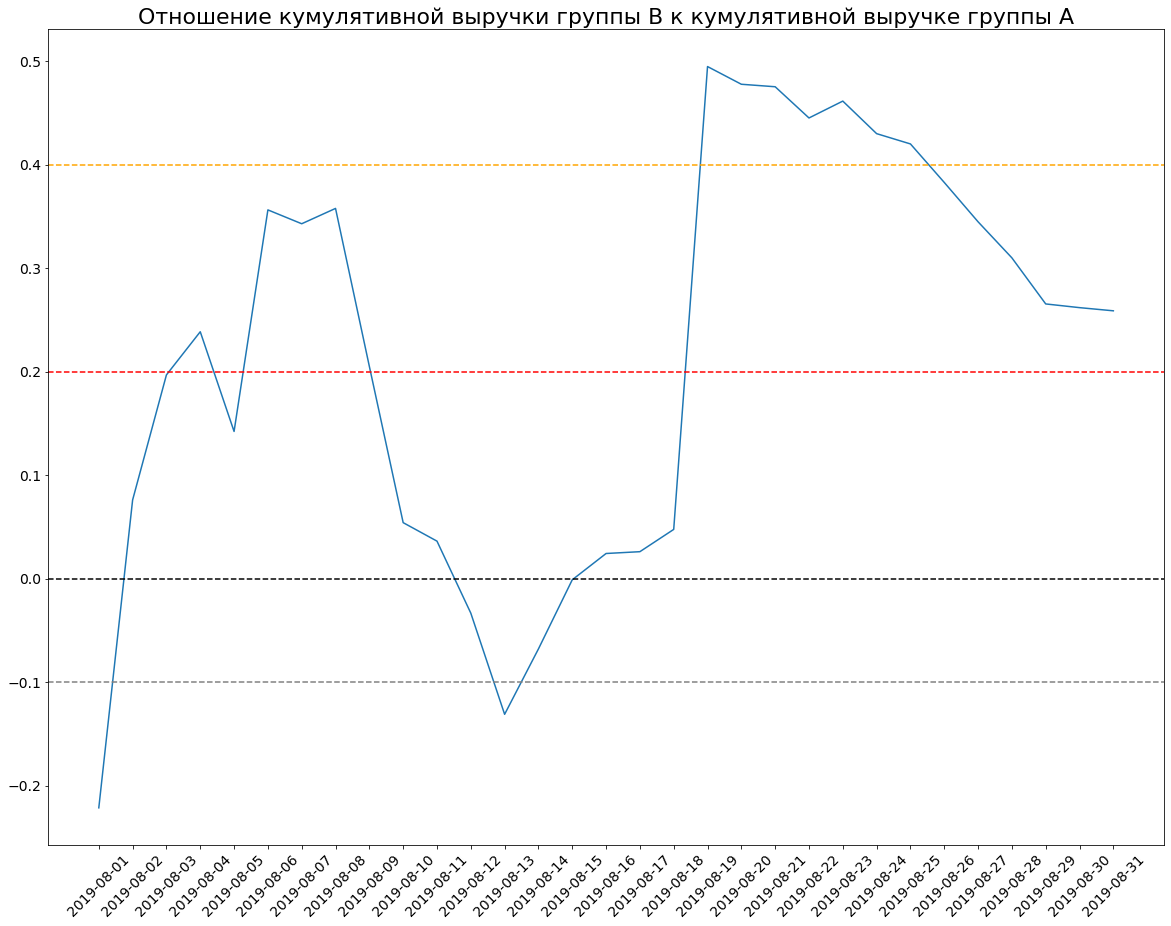

In [53]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize = (20,15))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='red', linestyle='--')
plt.axhline(y=0.4, color='orange', linestyle='--')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Отношение кумулятивной выручки группы B к кумулятивной выручке группы A', fontsize=22)
plt.show()

График отношения средних чеков подтверждает - в середине периода был выброс в группе A, далее резкий рост среднего чека в группе B и постепенноее снижение отношения средних чеков (за счет небольшого роста среднего чека в группе A и снижения среднего чека в группе B).

### Анализируем кумулятивное среднее количество заказов на одного пользователя

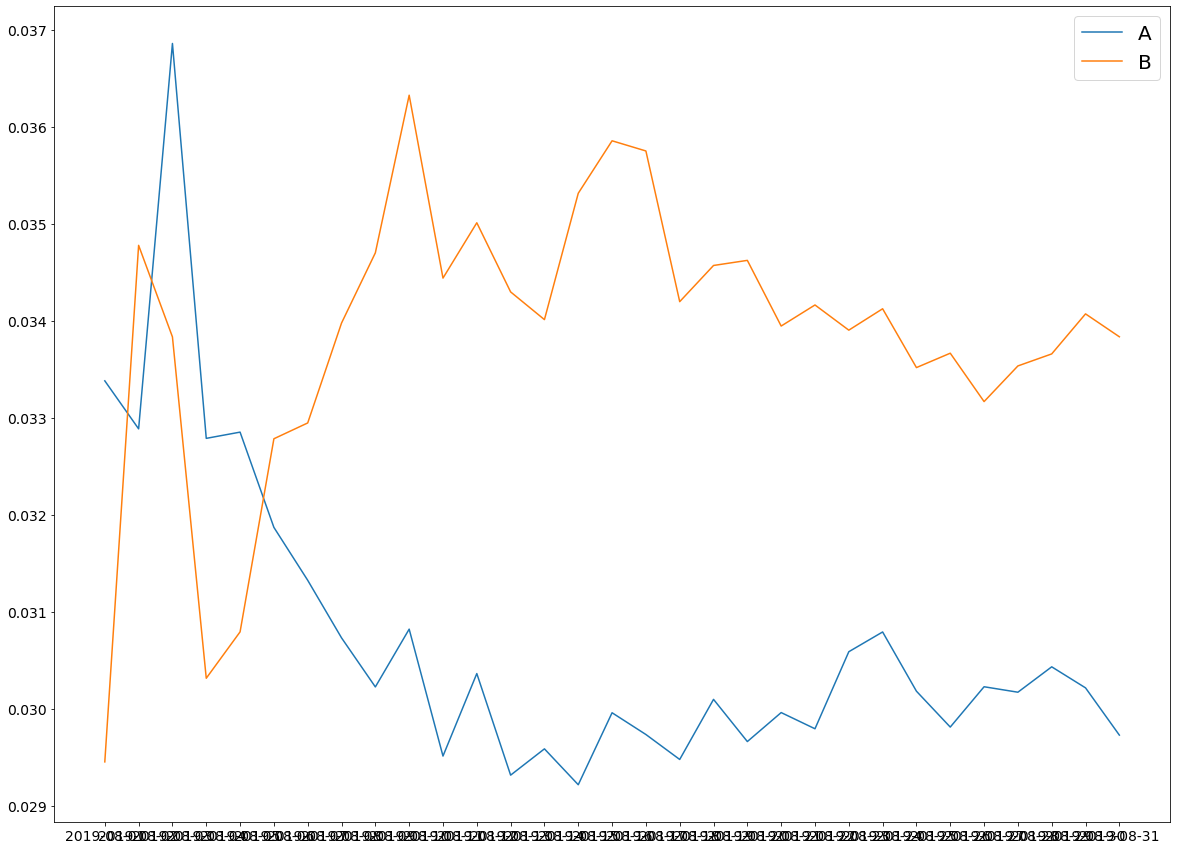

In [26]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (20,15))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

График симметричный со второй трети периода. Количество заказов колеблется, но не выравнивается, в обеих группах, при этом колебаний в группе B больше; самих заказов в группе B также больше, чем в группе A.

### Анализируем график изменения кумулятивного среднего количества заказов на пользователя из группы B к группе A

No handles with labels found to put in legend.


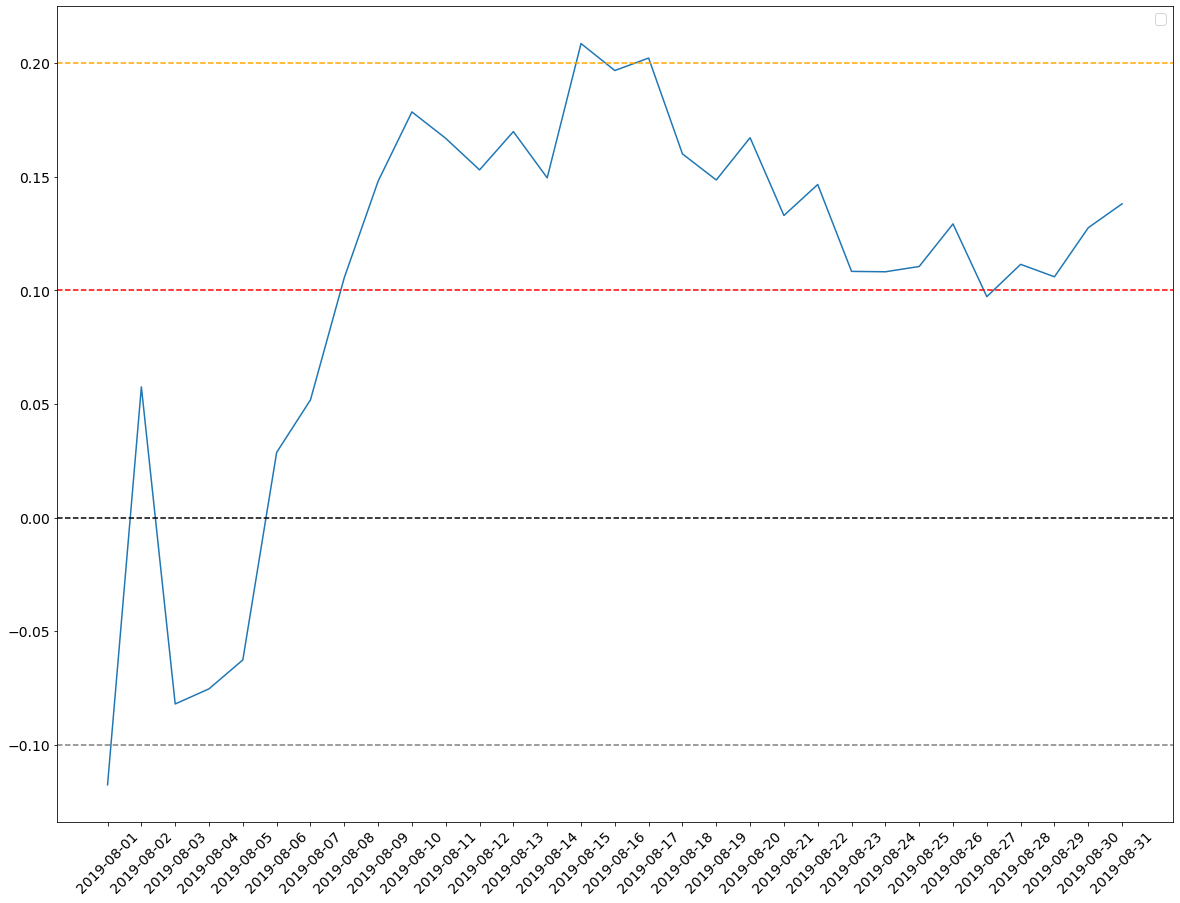

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left',
                                                                           suffixes=['A', 'B'])
plt.figure(figsize = (20,15))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='red', linestyle='--')
plt.axhline(y=0.2, color='orange', linestyle='--')
plt.show()

В начале периода, как и во всех предыдущих графиках, видим, что группа A лидирует, однако, со второй трети периода начинает лидировать и стабильно лидирует группа B.

### Строим точечный график количества заказов попользователям

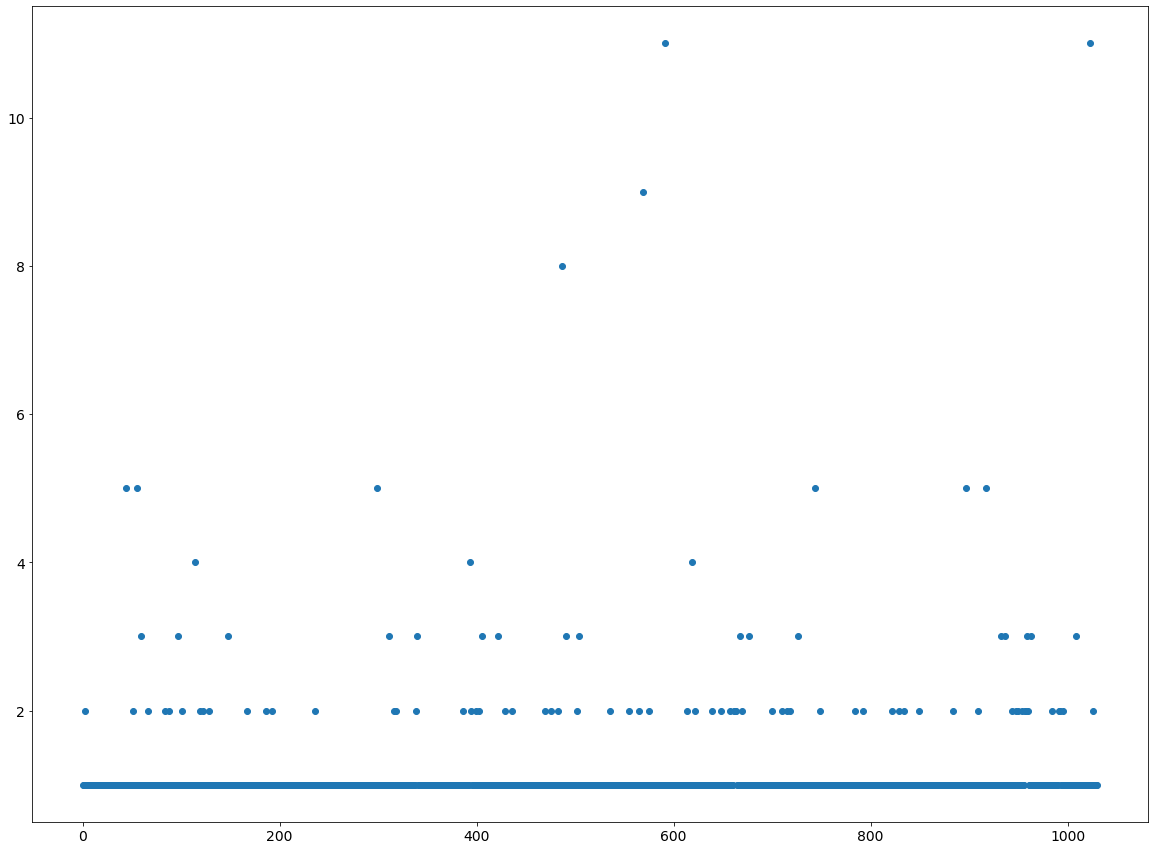

In [29]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(20,15))
plt.scatter(x_values, ordersByUsers['orders']) 
current_values = plt.gca().get_yticks()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

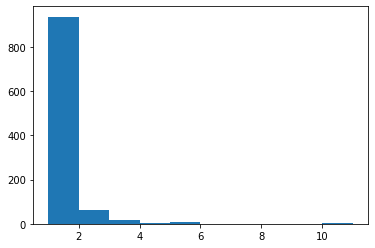

In [30]:
plt.hist(ordersByUsers['orders']) 
plt.show()

Большинство пользователей заказывали не более 2 раз, но есть достаточно много пользователей, которые заказывали 2-3 раза.

### Выбираем границу для определения аномальных пользователей.

Для этого посчитаем выборочные персентили количества заказов на одного пользователя.

In [39]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))
order_percentile = np.percentile(ordersByUsers['orders'], [90, 95, 99])[2]

[1. 2. 4.]


Итого, не более 1% пользователей сделали более 4 заказов, не более 5% пользователей заказывали 2 раза и более, 90% пользователей сделали только 1 заказ.

Разумно будет установить верхнюю границу нормы в 4 заказа - сюда попадут 99% пользователей.

### Строим точечный график стоимости заказов

/tmp/ipykernel_31/2432865016.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
No handles with labels found to put in legend.


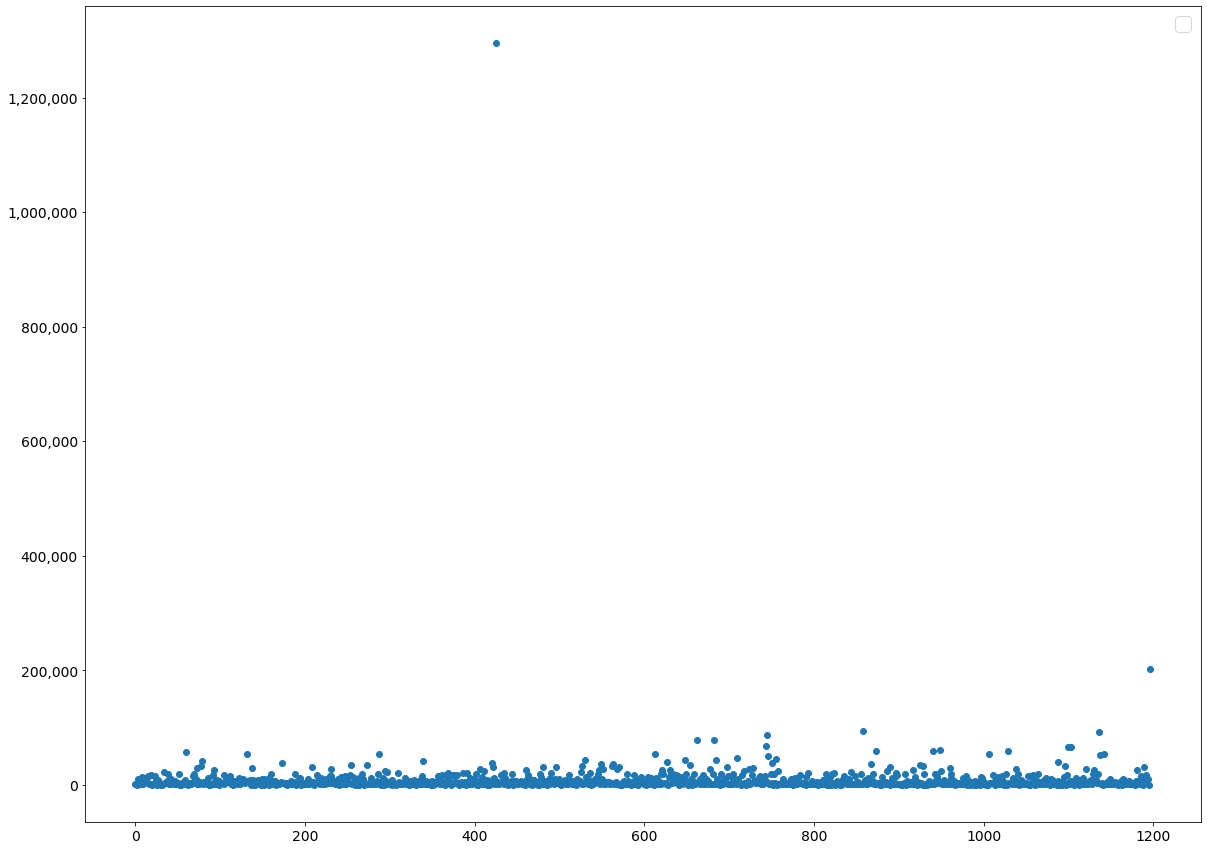

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20,15))
plt.scatter(x_values, orders['revenue']) 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

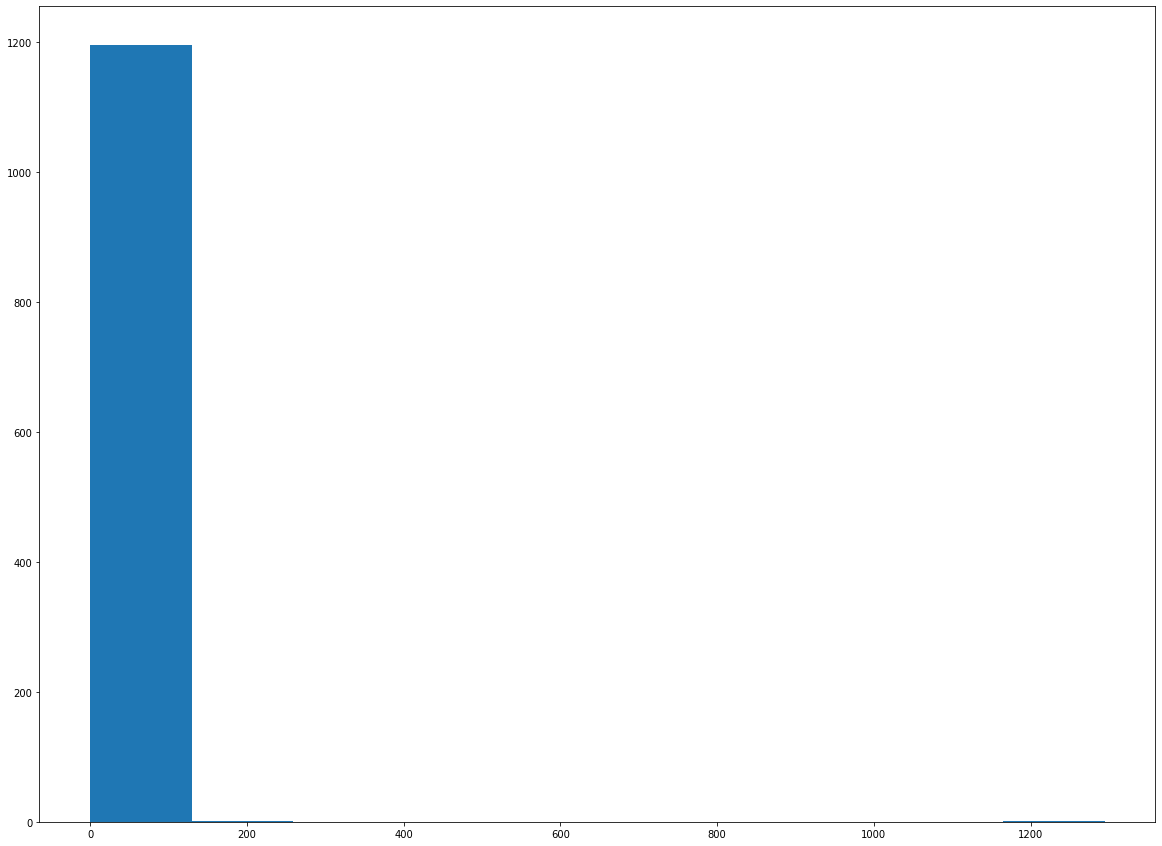

In [33]:
plt.figure(figsize=(20,15))
plt.hist(orders['revenue']/1000)
#plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

На гистограмме суммы заказов разделили на 1000 для облегчения восприятия.
Из графиков видно, что большая часть пользователей заказывала на сумму до 200 000, и есть небольшое количество пользователей, которые заказывали на более значительные суммы.

### Выбираем границу для определения аномальных заказов.

In [44]:
print(np.percentile(orders['revenue'], [90, 95, 99]))
sum_percentile = np.percentile(orders['revenue'], [90, 95, 99])[1].round(decimals=-4)

[18168.  28000.  58233.2]


1% заказов имеют стоимость более 58233.2, 5% заказов - стоимость более 28000, стоимость 90% заказов составляет 18168 и менее.

Разумно будет выбрать 30000 в качестве верхней границы стоимости заказов для отсечения аномальных - таким образом от 1 до 4 % аномально дорогих заказов будут отсечены.

### Определим статистическую значимость различий в количестве заказов между группами по сырым данным.

Для этого создадим новый набор данных и сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза выглядит так: различий в количестве заказов между группами нет.
Альтернативная гипотеза: различия в количестве заказов между группами есть.

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01  24              148579           21               
1  2019-08-02  20              93822            24               
2  2019-08-03  24              112473           16               
3  2019-08-04  16              70825            17               
4  2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996   

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-значение: ' + "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Отношение средних значений: ' + "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-значение: 0.017
Отношение средних значений: 0.138


P-значение значительно меньше 0,05, поэтому нулевую гипотезу отвергаем и принимаем альтернативную: существует различие в количестве заказов между группами A и B.

Количество заказов в группе B на 13,8 % больше, чем в группе A.

### Определим статистическую значимость различий в среднем чеке между группами по сырым данным.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [90]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-значение значительно больше 0.05, поэтому нулевую гипотезу не получается отвергнуть; получается, средний чек группы B равен среднему чеку группы A, а наблюдаемое различие обусловлено единичными выбросами.

### Выделяем аномальных пользователей для дальнейшей работы

Установим границу для аномальных пользователей по числу заказов - 4, по сумме заказа - 30000. Так мы отсекаем 1% аномальных пользователей по числу заказов и 1-4% аномальных заказов по стоимости.

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_percentile]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_percentile]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > sum_percentile]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64
53


Определили 53 аномальных пользователя.

### Определяем статистическую значимость различий в среднем количестве заказов между группами по очищенным данным

In [92]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [94]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.019
0.144


Результаты практически не изменились по сравнению с сырыми данными.

### Определяем статистическую значимость различий в среднем чеке между группами по очищенным данным

In [97]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.979
-0.017


Увеличилось P-значение, и сильно уменьшилась разница между группами.

### Выводы по результатам A/B-теста

- Имеется статистически значимое различие в количестве заказов между группами как по сырым данным, так и по данным после фильтрации аномалий - посетители группы B совершают больше заказов, чем посетители группы A.
- Нет статистически значимого различия в среднем чеке между группами как по сырым данным, так и по данным после фильтрации аномалий.
- Рис. 1 показывает, что начинается снижение отношения среднего чека группы B к среднему чеку группы A, но на данном этапе сделать однозначный вывод о том, что этот тренд сохранится, невозможно.
- Рис. 2 показывает, что разрыв в количестве заказов между группами A и B увеличивается, и можно сделать вывод о том, что разрыв, как минимум, сохранится и с большой степенью вероятности увеличится и далее.

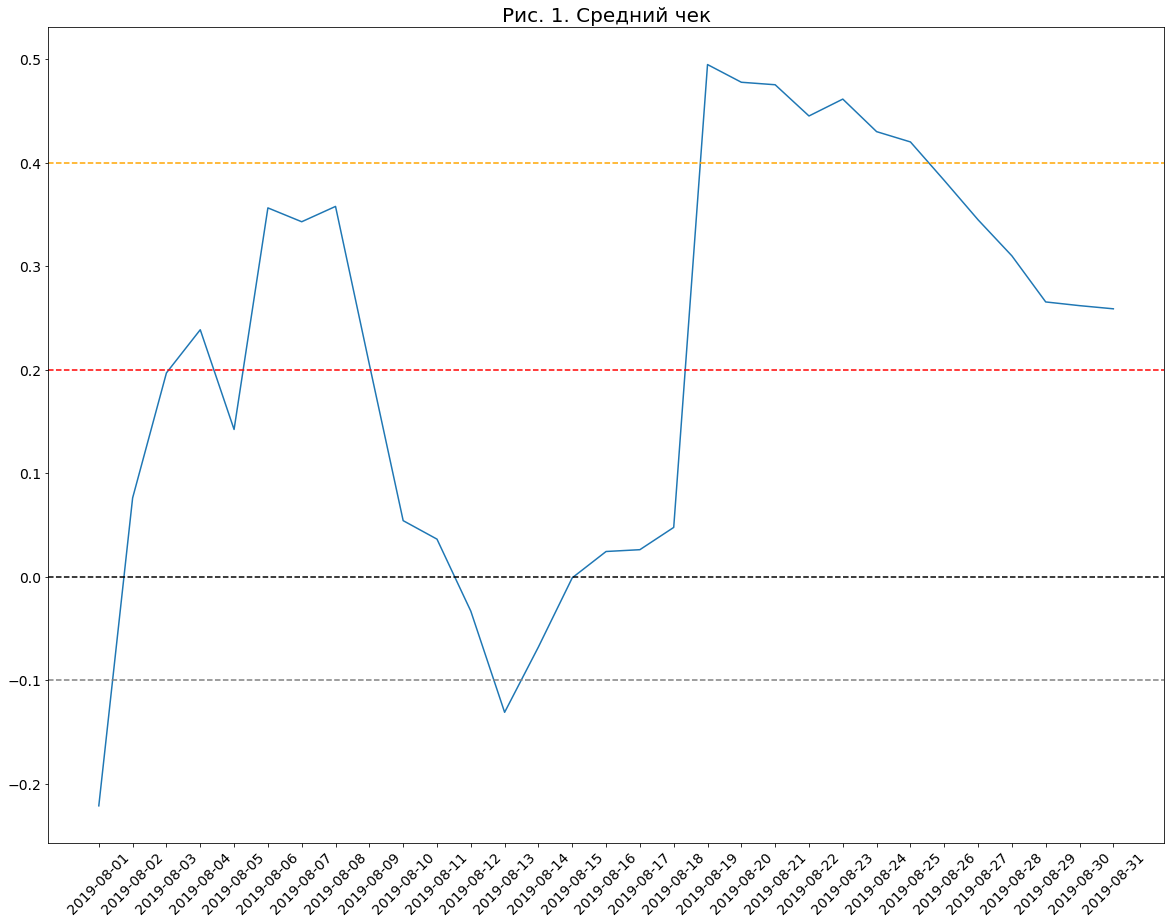

In [51]:
plt.figure(figsize = (20,15))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='red', linestyle='--')
plt.axhline(y=0.4, color='orange', linestyle='--')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Рис. 1. Средний чек', fontsize = 20)
plt.show()

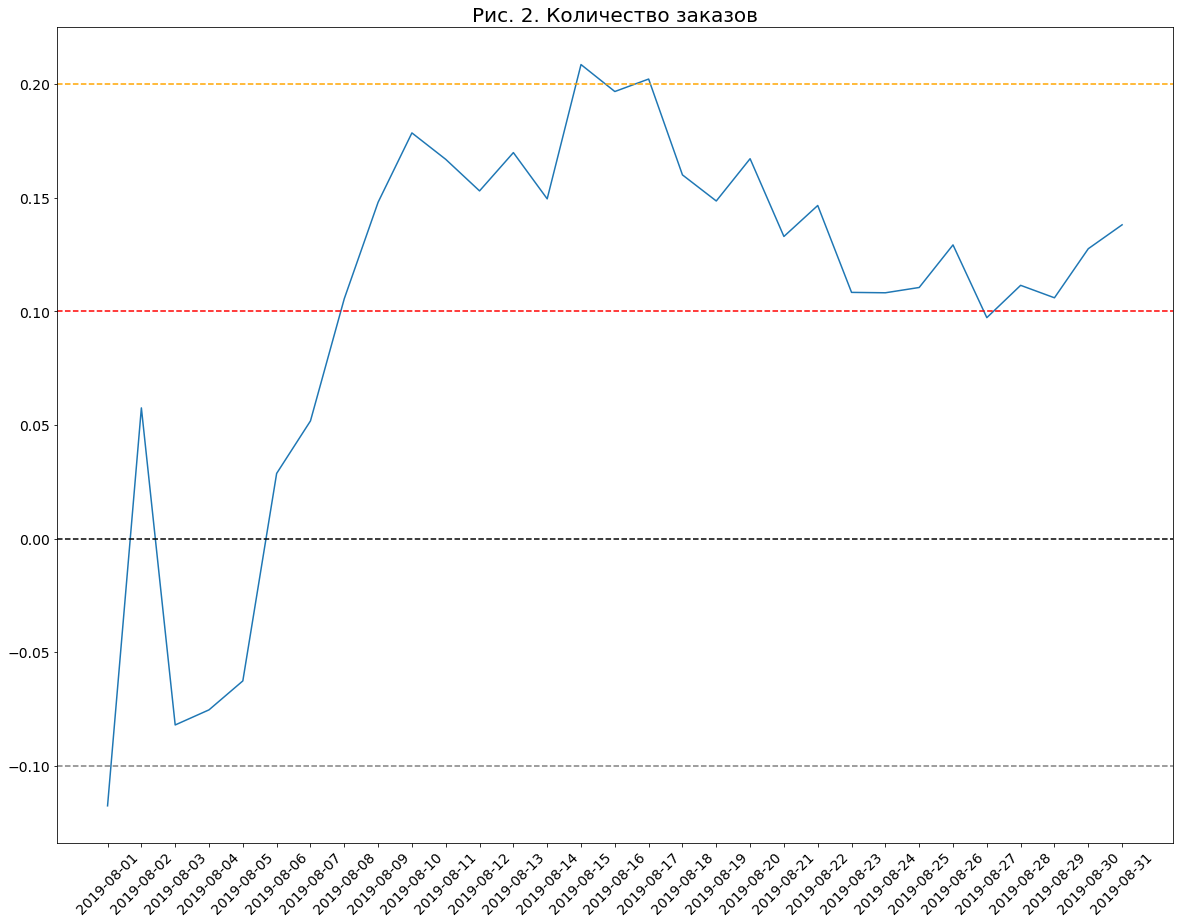

In [52]:
plt.figure(figsize = (20,15))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='red', linestyle='--')
plt.axhline(y=0.2, color='orange', linestyle='--')
plt.title('Рис. 2. Количество заказов', fontsize = 20)
plt.show()

**Вывод**

Имеет смысл остановить тест, зафиксировав победу группы B по количеству заказов, так как статистически значимых различий в среднем чеке между группами не наблюдается.